## Build a Model to decide weather a person is going to survive or not using Logistics Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Understanding

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

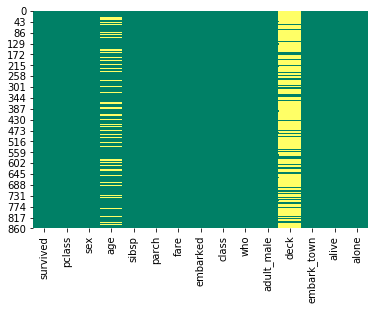

In [6]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='summer')

In [7]:
titanic['age'].isnull().sum()/titanic.shape[0]*100

19.865319865319865

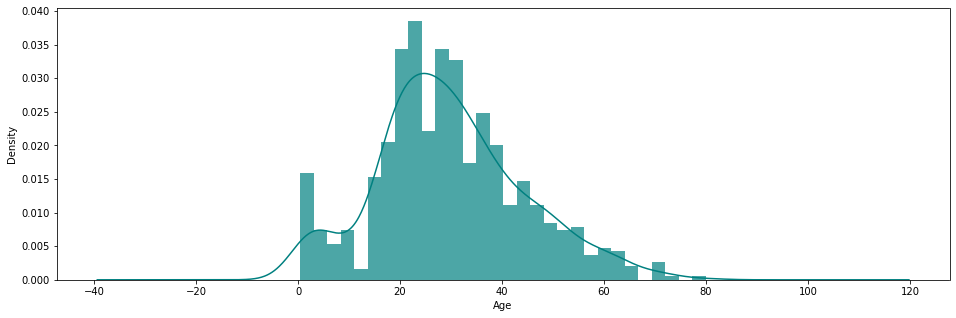

In [8]:
ax=titanic['age'].hist(bins=30,density=True,stacked=True,color='teal',alpha=0.7,figsize=(16,5))
titanic['age'].plot(kind='density',color='teal')
ax.set_xlabel('Age')
plt.show()

Text(0.5, 1.0, 'male')

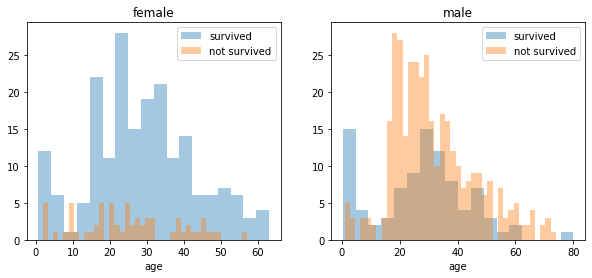

In [9]:
survived='survived'
not_survived='not survived'
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
women=titanic[titanic['sex']=='female']
men=titanic[titanic['sex']=='male']
ax=sns.distplot(women[women[survived]==1].age.dropna(),bins=18,label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women[survived]==0].age.dropna(),bins=40,label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('female')
ax=sns.distplot(men[men[survived]==1].age.dropna(),bins=18,label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men[survived]==0].age.dropna(),bins=40,label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title('male')



In [19]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

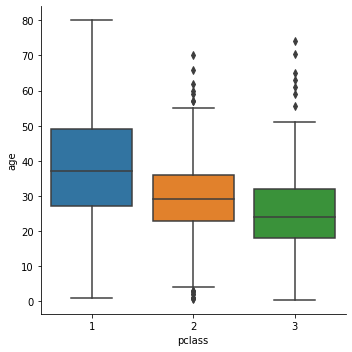

In [21]:
sns.catplot(x='pclass', y='age',data=titanic,kind='box')

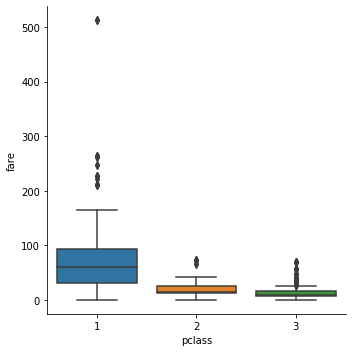

In [22]:
sns.catplot(x='pclass', y='fare',data=titanic,kind='box')

In [10]:
titanic[titanic['pclass']==1]['age'].mean()

38.233440860215055

In [11]:
titanic[titanic['pclass']==2]['age'].mean()

29.87763005780347

In [12]:
titanic[titanic['pclass']==3]['age'].mean()

25.14061971830986

In [13]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    if pd.isnull(age):
        if pclass==1:
            return titanic[titanic['pclass']==1]['age'].mean()
        elif pclass==2:
            return titanic[titanic['pclass']==2]['age'].mean()
        elif pclass==3:
            return titanic[titanic['pclass']==3]['age'].mean()
    else :
            return age

In [14]:
titanic['age']=titanic[['age','pclass']].apply(impute_age,axis=1)


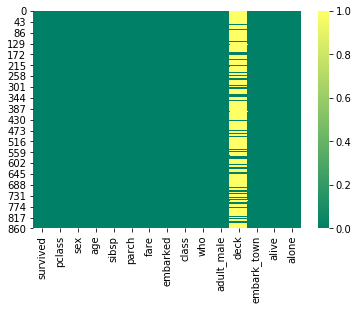

In [16]:
sns.heatmap(titanic.isnull(),cbar=True,cmap='summer')

## Analysing Embarked

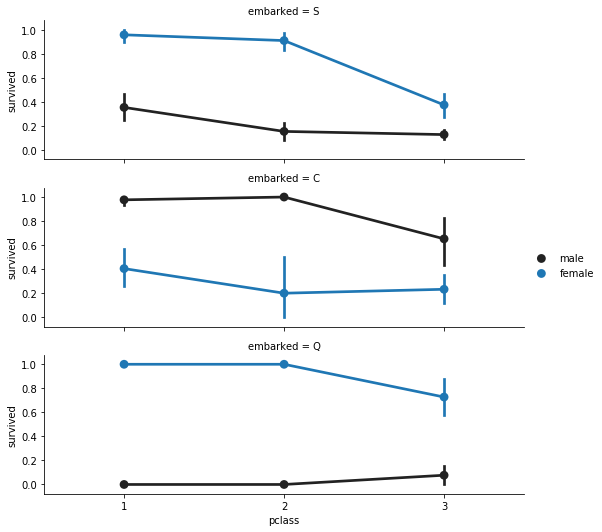

In [18]:
f=sns.FacetGrid(titanic,row='embarked',height=2.5,aspect=3)
f.map(sns.pointplot,'pclass','survived','sex', order=None, hue_order=None)
f.add_legend()

In [19]:
titanic['embarked'].isnull().sum()

2

In [20]:
titanic['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [21]:
common_value='S'
titanic['embarked'].fillna(common_value,inplace=True)

In [22]:
titanic['embarked'].isnull().sum()

0

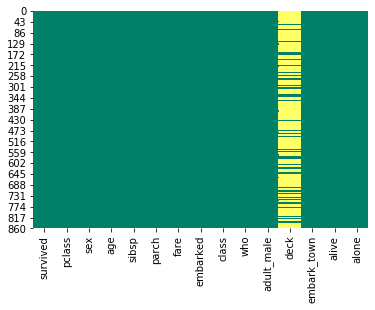

In [23]:
sns.heatmap(titanic.isnull(), cbar=False,cmap='summer')

In [24]:
titanic.drop(labels=['deck','embark_town','alive'], inplace=True, axis=1)

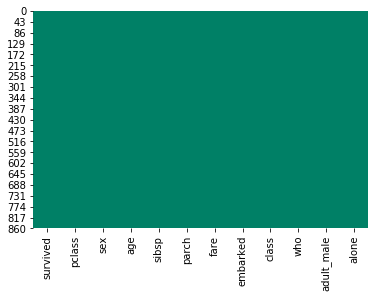

In [25]:
sns.heatmap(titanic.isnull(),cbar=False,cmap='summer')

## Convert Categorical values into Numerical